# Homework 2
## Exercise 2

In [1]:
import pyro.distributions as dist
import pyro
import torch
import seaborn as sns 
import matplotlib.pyplot as plt


/opt/anaconda3/envs/tutor2022/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def cdf(dist, x, n_samples):
    pyro.set_rng_seed(1)
    distribution_sample = [pyro.sample("distribution", dist) for i in range(n_samples)]
    
    
    sns.ecdfplot(data=torch.tensor(distribution_sample))
    plt.show()
    c=0
    for i in distribution_sample:
        if i<=x:
            c+=1
            
    
    
    
    return c/n_samples




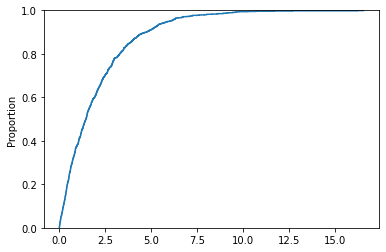

0.614

In [3]:
distribution=dist.Exponential(0.5)
x=2
n_samples=1000



cdf(distribution, x, n_samples)

## Exercise 3
### Part 1

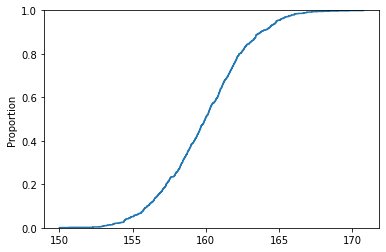

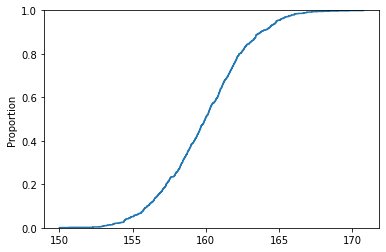

0.949

In [4]:
distribution=dist.Normal(160,3)
x=155
y=175

n_samples=1000



cdf(distribution, y, n_samples)-cdf(distribution, x, n_samples)

### Part 3

In [5]:
import math as mt

In [6]:
#prior parameters

mu_prior=160
var_prior=9


In [7]:
#posterior parameters

var_like=36
a=[174, 158, 194, 167]

mu_post=(1/((1/var_prior)+(len(a)/var_like)))*((mu_prior/var_prior)+(sum(a)/var_like))
var_post=1/((1/var_prior)+(len(a)/var_like))     
sigma_post=mt.sqrt(var_post)


In [8]:
mu_post

166.625

In [9]:
normal =  dist.Normal(mu_post, sigma_post)
normal_samples = [pyro.sample("normal posterior",normal) for i in range(1000)]

In [10]:
normal_prior=dist.Normal(mu_prior, 3)
normal_samples_prior = [pyro.sample("normal prior",normal_prior) for i in range(1000)]

/opt/anaconda3/envs/tutor2022/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/tutor2022/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


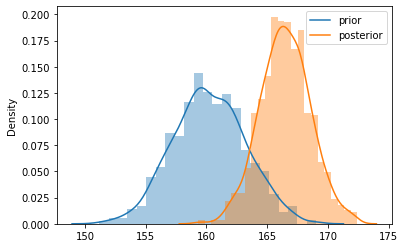

In [11]:
sns.distplot(normal_samples_prior)
sns.distplot(normal_samples)
plt.legend(labels=["prior","posterior"])
plt.show()